In [1]:
import json
import re
from copy import deepcopy

import joblib
import numpy as np
import pandas as pd
import plotly
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
with open("../dataset/IMDB/IMDB_reviews.json") as json_file:
    raw = pd.DataFrame(json.loads('[' + ',\n'.join(json_file.readlines()) + ']'))

In [3]:
len(raw['movie_id'].unique())

1572

In [4]:
data, test = train_test_split(raw, test_size=0.2, random_state=42)

In [10]:
per_film = pd.DataFrame(data)
per_film = per_film[['movie_id', 'review_text']].groupby('movie_id').agg(sum)
per_film = per_film['review_text']
#per_book = per_book['review_text'].map(lambda x: ' '.join(x))

In [7]:
len(per_film.iloc[0]['review_text'])

145602

In [11]:
per_film

movie_id
tt0012349    Chaplin's The Kid is more of a 'normal' movie ...
tt0015864    I have never seen a silent movie before I watc...
tt0017136    Metropolis's history is both famous and infamo...
tt0017925    I can honestly say that I loved this film and ...
tt0018455    You'll have to suspend a whole lot of disbelie...
                                   ...                        
tt6048596    For starters, I really enjoyed this TV show. W...
tt6294822    Steven Spielberg returns to top-form with 'The...
tt6868216    Psych was a very creative and funny spin on th...
tt7608418    I love this movie SO much. it is the only movi...
tt7608534    I went into this hoping for some cotton-candy ...
Name: review_text, Length: 1572, dtype: object

In [12]:
vectorizer = TfidfVectorizer(max_df=0.9)
vectorizer = vectorizer.fit(per_film)

In [14]:
del per_film

In [13]:
joblib.dump(vectorizer, 'models_IMDB/vect.joblib')

['models_IMDB/vect.joblib']

# Preprocess

In [16]:
x = data['review_text'].values
y = data['is_spoiler'].values

x_test = test['review_text'].values
y_test = test['is_spoiler'].values

In [22]:
del data

In [18]:
for id, i in tqdm(enumerate(x), total=len(x)):
    text = re.sub(r'http\S+', '', i.lower())
    # text = str(TextBlob(text).correct())
    x[id] = text

100%|██████████| 459130/459130 [00:02<00:00, 226338.67it/s]


In [19]:
for id, i in tqdm(enumerate(x_test), total=len(x)):
    text = re.sub(r'http\S+', '', i.lower())
    # text = str(TextBlob(text).correct())
    x_test[id] = text

 25%|██▌       | 114783/459130 [00:00<00:01, 204380.75it/s]


In [20]:
x = vectorizer.transform(x)

In [21]:
x_test = vectorizer.transform(x_test)

# LogReg

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(random_state=0)

In [25]:
clf = clf.fit(x, y)
joblib.dump(clf, 'models/logreg.joblib')

['models/logreg.joblib']

In [26]:
x_pred = clf.predict_proba(x_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report

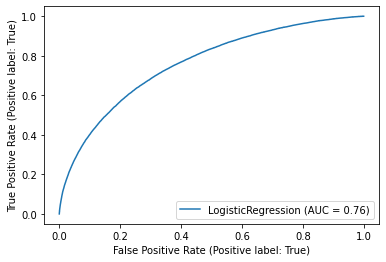

In [28]:
metrics.plot_roc_curve(clf, x_test, y_test) 

In [29]:
print(metrics.classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

       False       0.79      0.94      0.86     84742
        True       0.64      0.30      0.41     30041

    accuracy                           0.77    114783
   macro avg       0.72      0.62      0.64    114783
weighted avg       0.75      0.77      0.74    114783

